In [ ]:
# dataset link
# https://www.kaggle.com/c/digit-recognizer

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
df = pd.read_csv('data/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_data = df.values
np.random.shuffle(train_data)
X = train_data[:, 1:].reshape(-1, 28, 28) / 255.0
Y = train_data[:, 0]

In [13]:
from tensorflow.keras.layers import Dense, Concatenate, LSTM, Bidirectional, Lambda, GlobalMaxPooling1D, Input
from tensorflow.keras.models import Model
import tensorflow.keras.backend as keras_backend

In [15]:
input_layer = Input(shape = (28, 28))
rnn_layer_1 = Bidirectional(LSTM(15, return_sequences = True))(input_layer)
pool_layer_1 = GlobalMaxPooling1D()(rnn_layer_1)

permuter = Lambda(lambda x: keras_backend.permute_dimensions(x, pattern = (0, 2, 1)))

permute_later = permuter(input_layer)
rnn_layer_2 = Bidirectional(LSTM(15, return_sequences = True))(permute_later)
pool_layer_2 = GlobalMaxPooling1D()(rnn_layer_2)

concatenator = Concatenate(axis = 1)

concat_layer = concatenator([pool_layer_1, pool_layer_2])
output_layer = Dense(10, activation = 'softmax')(concat_layer)

model = Model(input_layer, output_layer)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 28, 28)]             0         []                            
                                                                                                  
 lambda_1 (Lambda)           (None, 28, 28)               0         ['input_3[0][0]']             
                                                                                                  
 bidirectional_2 (Bidirecti  (None, 28, 30)               5280      ['input_3[0][0]']             
 onal)                                                                                            
                                                                                                  
 bidirectional_3 (Bidirecti  (None, 28, 30)               5280      ['lambda_1[0][0]']        

In [16]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [17]:
r = model.fit(X, Y, batch_size = 32, epochs = 10, validation_split = 0.25)

Epoch 1/10


985/985 [==============================] - 15s 10ms/step - loss: 0.7538 - accuracy: 0.8149 - val_loss: 0.3196 - val_accuracy: 0.9130
Epoch 2/10
985/985 [==============================] - 8s 8ms/step - loss: 0.2357 - accuracy: 0.9343 - val_loss: 0.2068 - val_accuracy: 0.9414
Epoch 3/10
985/985 [==============================] - 8s 8ms/step - loss: 0.1679 - accuracy: 0.9518 - val_loss: 0.1549 - val_accuracy: 0.9556
Epoch 4/10
985/985 [==============================] - 8s 9ms/step - loss: 0.1344 - accuracy: 0.9606 - val_loss: 0.1391 - val_accuracy: 0.9606
Epoch 5/10
985/985 [==============================] - 9s 9ms/step - loss: 0.1143 - accuracy: 0.9665 - val_loss: 0.1181 - val_accuracy: 0.9651
Epoch 6/10
985/985 [==============================] - 8s 8ms/step - loss: 0.1034 - accuracy: 0.9703 - val_loss: 0.1090 - val_accuracy: 0.9689
Epoch 7/10
985/985 [==============================] - 8s 8ms/step - loss: 0.0902 - accuracy: 0.9738 - val_loss: 0.1145 - val_accuracy: 0.9661
Ep

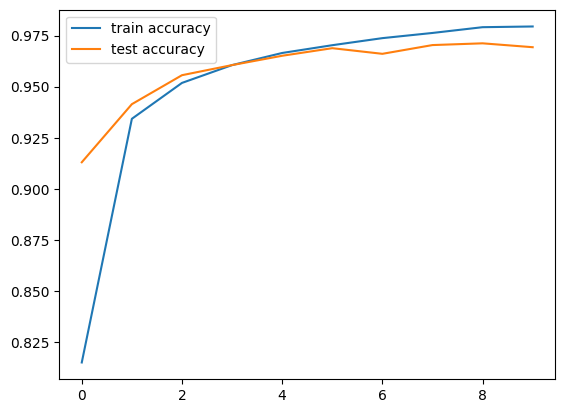

In [18]:
plt.plot(r.history['accuracy'], label = 'train accuracy')
plt.plot(r.history['val_accuracy'], label = 'test accuracy')
plt.legend()
plt.show()

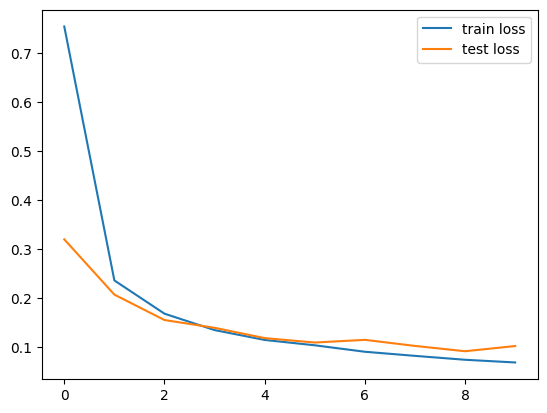

In [19]:
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()